In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.chrome.options import Options
from datetime import datetime
import pandas as pd

options = webdriver.ChromeOptions() 
options.add_argument("--headless")
PATH = "C:\Program Files (x86)\chromedriver.exe"
options.add_experimental_option("excludeSwitches", ["enable-logging"])
driver = webdriver.Chrome(PATH, options=options)

#add url of product you wish to track
URLS={'example_book_name': 'www.book_url_here.com'}

driver.implicitly_wait(2)

C:\Users\zubik\AppData\Local\Temp\ipykernel_13592\1265136138.py:12: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH, options=options)


In [2]:
series = pd.Series()
series.name = str(datetime.now())[5:-13] + "hs"

C:\Users\zubik\AppData\Local\Temp\ipykernel_13592\3839793708.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  series = pd.Series()


In [3]:
data = pd.read_excel('book_prices_data.xlsx',index_col=0) #for pre-existing data

for title in URLS:
    
    driver.get(URLS[title])
    
    try:
        price = driver.find_element(by=By.CLASS_NAME, value="list-price")
    except NoSuchElementException:
        price = 0

    try:
        unavailable = driver.find_element(by=By.CLASS_NAME, value="red-text")
        unavailable_var = 1
    except NoSuchElementException:
        unavailable_var = 0

    try:
        sale_price = driver.find_element(by=By.CLASS_NAME, value="sale-price")
    except NoSuchElementException:
        sale_price = 0
    
    if unavailable_var == 1:
        if unavailable.text == 'Currently unavailable':
            series[title] = 0 #unavailable
            continue
    if sale_price != 0:
        series[title] = int(sale_price.text[4:-3].replace('.',''))
    elif price != 0:
        series[title] = int(price.text[:-3].replace('.','').replace('ARS$', '').replace('List price:',''))



Ahorra ARS$582,76
You save ARS$4.742,14
You save ARS$4.372,75
You save ARS$3.728,14
Currently unavailable
setted correctly


In [4]:
dataf = data.append(series)
dataf.to_excel('book_prices_data.xlsx')
driver.close()

C:\Users\zubik\AppData\Local\Temp\ipykernel_13592\235040301.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataf = data.append(series)


Visualization:

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

sns.set()
data = pd.read_excel('book_prices_data.xlsx',index_col=0)

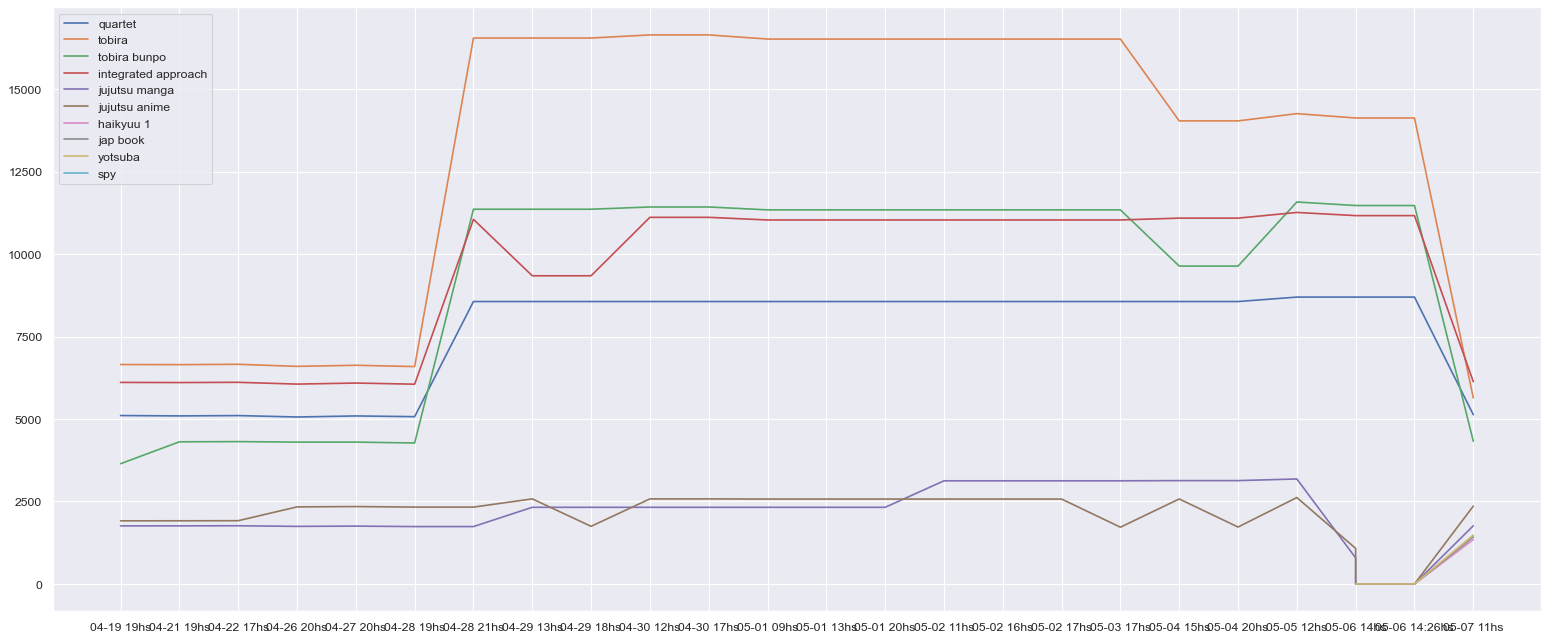

In [8]:
figure(figsize=(24, 10), dpi=80)
plt.plot(data)
plt.legend(data.columns)

# plt.yticks([x*300 for x in range(4,60)])
plt.show();

In [9]:
#index renaming(adding minutes, seconds, etc)
# id = list(data.index)
# for x in range(len(id)):
#     id[x] = id[x][:-3] + "hs"
# data.index = id
# data.to_excel('book_prices_data.xlsx')